<a href="https://colab.research.google.com/github/laway/tensorflow/blob/main/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with Neural Networks in Tensor Flow

There are many definitions for a regression problem but in our case we're going to simplify it: prediction a numerical variable based on some other combination of variables, even shorteer: predicting a number

In [1]:
import tensorflow as tf
print("Tensorflow version: " + tf.__version__)

Tensorflow version: 2.14.0


## Creating some data to view and fit

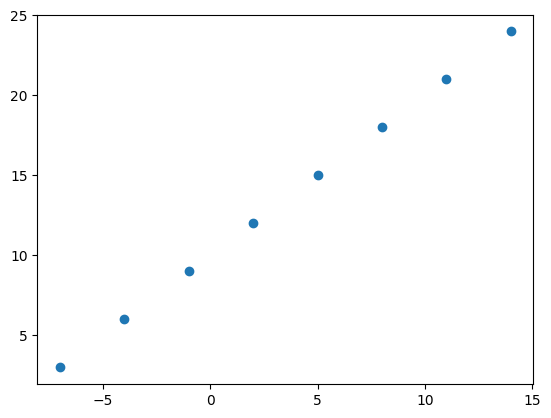

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

## Input and output shapes

In [3]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [5]:
X[0].ndim

0

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
# Turn our NumPy array into tensors with type float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

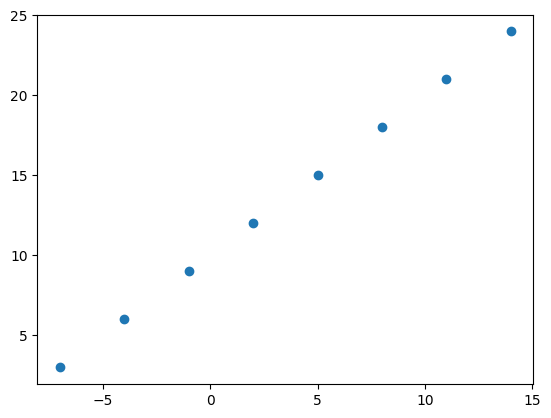

In [9]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1.   **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2.   **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

In [10]:
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # SGD is short for stochastic gradial descent
              metrics = ["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)


Epoch 1/5
1/1 [==============================] - 6s 6s/step - loss: 12.5469 - mae: 12.5469
Epoch 2/5
1/1 [==============================] - 0s 23ms/step - loss: 12.4144 - mae: 12.4144
Epoch 3/5
1/1 [==============================] - 0s 18ms/step - loss: 12.2819 - mae: 12.2819
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 12.1494 - mae: 12.1494
Epoch 5/5
1/1 [==============================] - 0s 20ms/step - loss: 12.0169 - mae: 12.0169


In [11]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 349ms/step


array([[7.654564]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create a model.
1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation functions of each layer.
2. **Compiling a model** - here we might change the optimization function or, perhaps, the **learning rate** of the optimization function
3. **Fitting a model** - here we might fit a model for more epochs (leave it training for longer) or on mode data (give the model more examples to learn from)

In [13]:
# let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fitting a model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 12.4497 - mae: 12.4497
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 12.3172 - mae: 12.3172
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 12.1847 - mae: 12.1847
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 12.0522 - mae: 12.0522
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 11.9197 - mae: 11.9197
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 11.7872 - mae: 11.7872
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 11.6547 - mae: 11.6547
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 11.5222 - mae: 11.5222
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 11.3897 - mae: 11.3897
Epoch 10/100
1/1 [==============================] - 0s 25ms/step - loss: 11.2572 - mae: 11.2572
Epoch 11/100
1/1 [==============================] -

In [14]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
model.predict([17.0])

1/1 [==============================] - 0s 156ms/step


array([[29.751596]], dtype=float32)

In [16]:
# recreating once again (with extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["mae"])

model.fit(tf.expand_dims(X, axis = -1), y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.9583 - mae: 13.9583
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.2432 - mae: 13.2432
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.5290 - mae: 12.5290
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 11.8126 - mae: 11.8126
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 11.0911 - mae: 11.0911
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 10.3614 - mae: 10.3614
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 9.6207 - mae: 9.6207
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 8.8664 - mae: 8.8664
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 8.0963 - mae: 8.0963
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 7.3076 - mae: 7.3076
Epoch 11/100
1/1 [==============================] - 0s 13ms

In [17]:
model.predict([17.0])

1/1 [==============================] - 0s 270ms/step


array([[27.673862]], dtype=float32)

## Evaluating a model

In practice a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation there are 3 workds you should memorize:

> "Visualize, visualize, visualize"

It is a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of the model line up against the ground truth?

In [18]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [19]:
# Make labels for the bigger dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

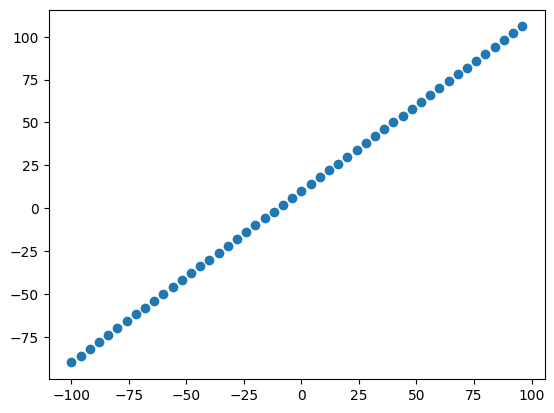

In [20]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this model, typicall 70-80% of the total data have available.
* **Validation set** - the model gets tuned using this set, which is typicall 10-15% of the data available
* **Test set** - the model gets evaluated on this data to test what is has learned. This set is typically 10-15% of the total data available



In [21]:
# Check the length of how many samples we have
len(X)

50

In [22]:
# Split the data into train and test sets
X_train = X[:40] #first 40 training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10  are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and t est sets... Let's visualize it again!

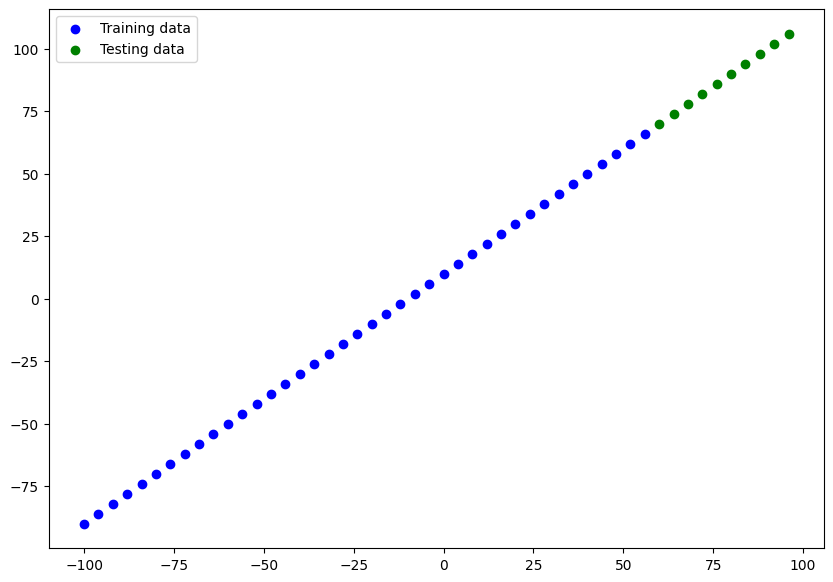

In [23]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c = "b", label = "Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c = "g", label = "Testing data")
#show a legend
plt.legend()

In [24]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
#model.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

### Visualizing the model

In [25]:
# Let's create a model which builds automaticall by definining the input_shape argument in the first layer

tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name = "input_layer"),
    tf.keras.layers.Dense(1, name = "output_layer")
], name = "model01_2")

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

model.summary()



Model: "model01_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable params - these are the parameters (patterns) the model can update as it trains
* Non-trainable params - these parameters are not updated during training. This is typical when you bring in already learned patterns or parameters from other models during transfer learning

**Resource:** For a mode in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video: http://introtodeeplearning.com

In [26]:
# Fit the mode
model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose = 0)

In [27]:
# Get a summary of our model
model.summary()

Model: "model01_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


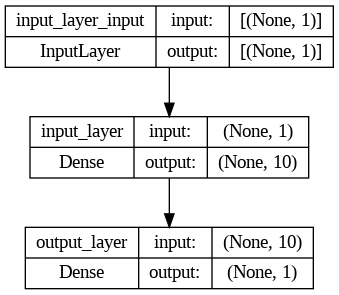

In [28]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes = True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model predictions)

In [29]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 63ms/step


array([[35.037994],
       [37.27858 ],
       [39.519165],
       [41.75975 ],
       [44.00033 ],
       [46.24092 ],
       [48.481506],
       [50.72209 ],
       [52.962677],
       [55.203262]], dtype=float32)

In [30]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If you feel like you're going to re-use some kind of functionality in the future it is a good idea to turn it into a function

In [101]:
# Let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  """
  Plots training data, test data and compares predictions to the ground truth labels
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", label = "Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c = "g", label = "Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c = "r", label = "Predictions")
  # Show the legend
  plt.legend()

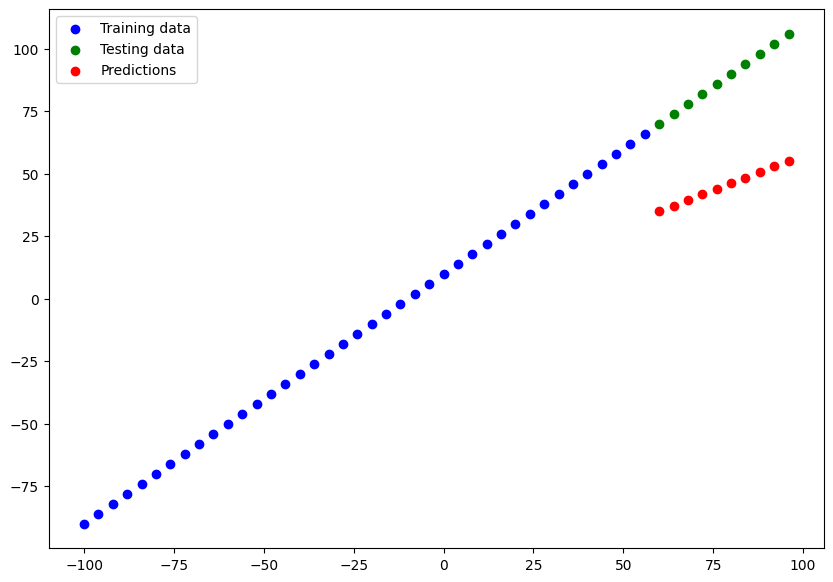

In [32]:
plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the avarage errors"

In [33]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 141ms/step - loss: 42.8794 - mae: 42.8794


[42.879371643066406, 42.879371643066406]

In [34]:
# Calculate the mean absolute error
tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=42.87937>

In [35]:
# Calculate the mean square error
tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=1864.179>

In [49]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true, y_pred = tf.squeeze(y_pred))

In [50]:
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true, y_pred = tf.squeeze(y_pred))

In [38]:
mae(y_test, tf.squeeze(y_pred)), mse(y_test, tf.squeeze(y_pred))

(<tf.Tensor: shape=(), dtype=float32, numpy=42.87937>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1864.179>)

### Running experiments to improve our model

```
Build model -> fit it -> evaluate it -> tweak it ->...
```

1. Get more data - get more example for the model to train on (more opportunities to learn patterns or relationships between features and labels)
2. Make your model larger (using a more complex model) - this might come if the form of more layers or more hidden units in each layer
3. Train for longer - give your model more of a chance to find patterns in the data

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for a 100 epochs
2. `model_2` - 2 layers, trained for a 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs
4.
5.

In [40]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

**Build `model_1`**

In [ ]:
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

1/1 [==============================] - 0s 42ms/step


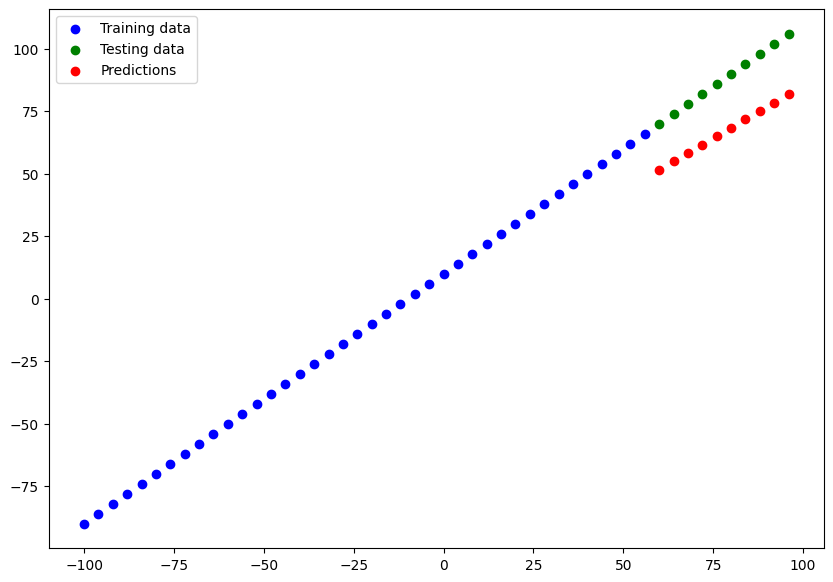

In [102]:
# Make and plot predictions for `model_1`
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [51]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=21.28333>,
 <tf.Tensor: shape=(), dtype=float32, numpy=456.417>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [106]:
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name = "Hidden"),
    tf.keras.layers.Dense(1, name = "Output_layer")
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

In [88]:
y_preds_2 = model_2.predict(X_test)

1/1 [==============================] - 0s 63ms/step


In [89]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1082351>,
 <tf.Tensor: shape=(), dtype=float32, numpy=12.464548>)

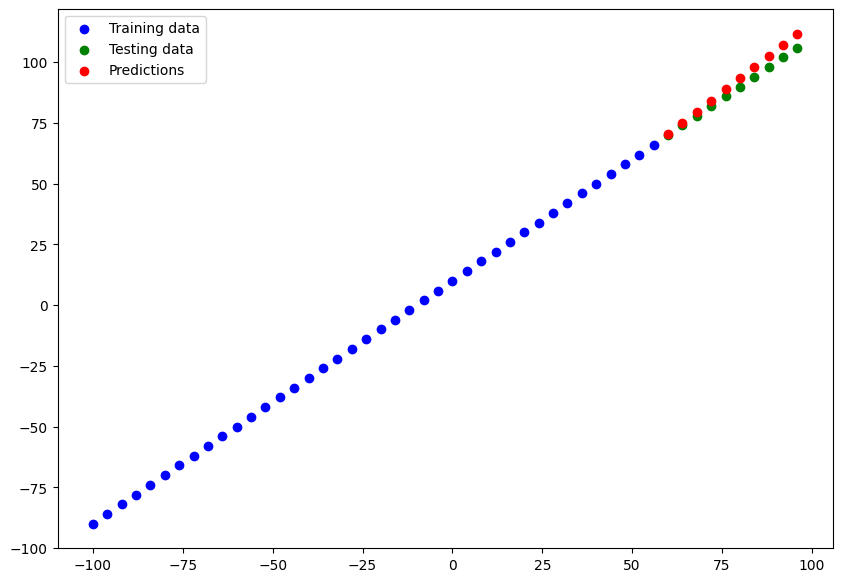

In [103]:
plot_predictions(predictions = y_preds_2)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [120]:
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile a model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mse"])

# Fit a model
model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 500, verbose = 0)

In [121]:
y_preds_3 = model_3.predict(X_test)
y_preds_3

1/1 [==============================] - 0s 47ms/step


array([[15.963467],
       [16.733797],
       [17.504126],
       [18.274456],
       [19.044788],
       [19.815117],
       [20.585445],
       [21.355778],
       [22.126106],
       [22.896439]], dtype=float32)

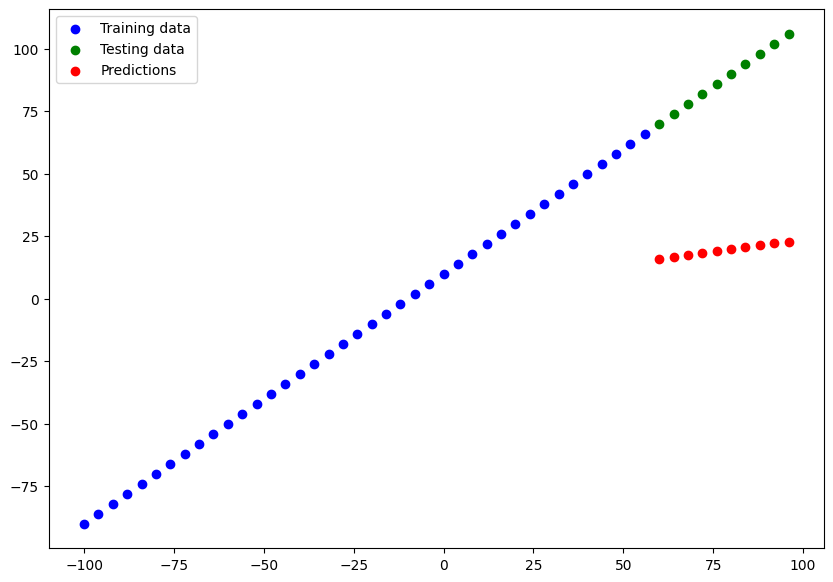

In [122]:
plot_predictions(predictions = y_preds_3)

In [119]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.43595>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4769.179>)

## Comparing the results of our experiments

WE've run a few experiments now, let's compare results